In [1]:
import pandas as pd
from string import punctuation
 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras.optimizers import Adam
from keras.datasets import fashion_mnist 
from keras import models 
from keras import layers 
from keras import optimizers 
from keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
# from keras.preprocessing  import  image /

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import h5py

In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print('x_train Shape: {}'.format(x_train.shape))
print('x_test Shape: {}'.format(x_test.shape))
print('y_train Shape: {}'.format(y_train.shape))
print('y_test Shape: {}'.format(y_test.shape))

x_train Shape: (50000, 32, 32, 3)
x_test Shape: (10000, 32, 32, 3)
y_train Shape: (50000, 1)
y_test Shape: (10000, 1)


In [4]:
num_classes = 10
classes = { 0:"airplane(літак)", 
            1: "automobile(автомобіль)",
            2: "bird(птах)",
            3: "cat(кот)",
            4: "deer(олень)",
            5: "dog(пес)",
            6: "frog(жаба)",
            7: "horse(кінь)",
            8: "ship(корабель)",
            9: "truck(вантажівка)"}

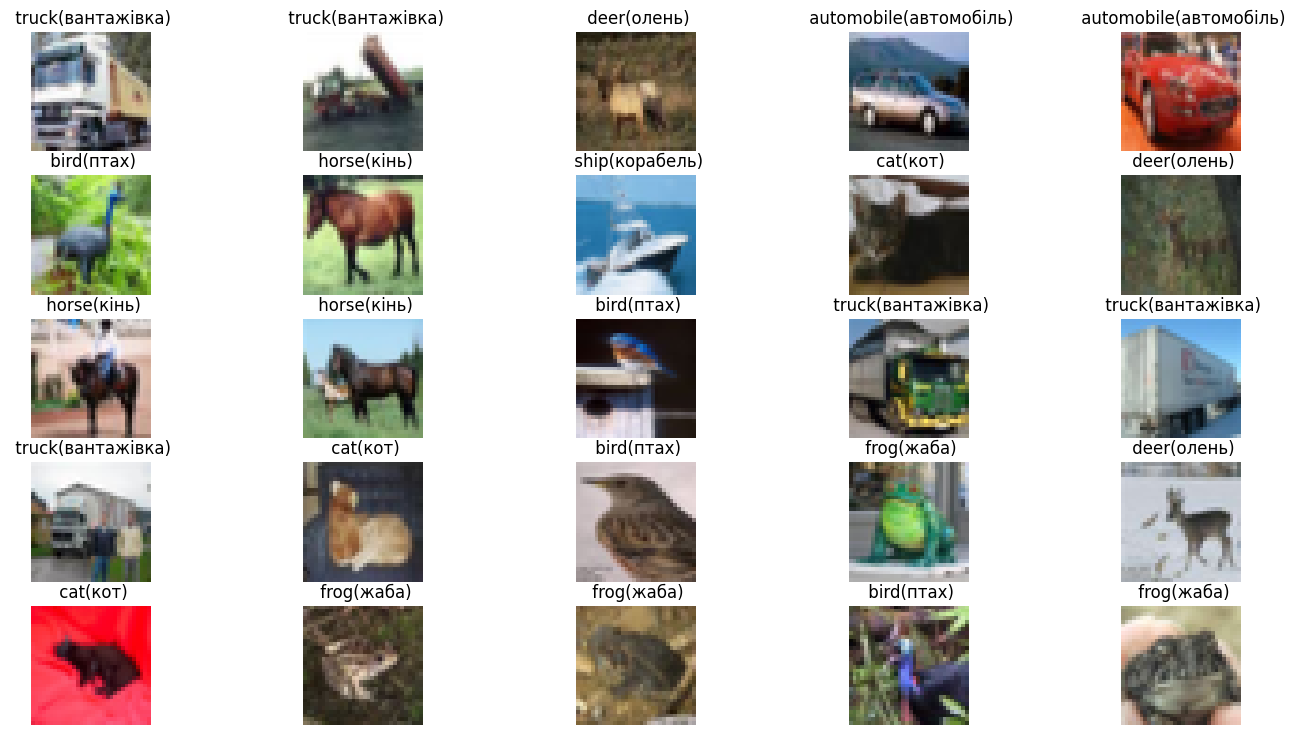

In [69]:
plt.figure(figsize=(17,9))
for i in range(1, 26):
  plt.subplot(5, 5, i-1 + 1)
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.title(f" {classes[y_train[i][0]]}")

In [5]:
 
# set up image augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.3
    )
datagen.fit(x_train)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0

# Преобразуем метки в категории


y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

print(f"x_train: {x_train.shape}, x_test: {x_test.shape}\ny_train: {y_train.shape}, y_test: {y_test.shape}")

x_train: (50000, 32, 32, 3), x_test: (10000, 32, 32, 3)
y_train: (50000, 10), y_test: (10000, 10)


In [7]:
reg=None
reg2=None
num_filters=32
ac='relu'
# adm=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
# opt=adm
drop_dense=0.5
drop_conv=0
input_shape = (32,32, 3)

model = Sequential(name='cifar10')

# Слой 2D-свертки (например, пространственная свертка изображений)
model.add(Conv2D(num_filters, (3, 3), activation=ac, kernel_regularizer=reg,  input_shape=(32,32, 3), padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(num_filters, (3, 3), activation=ac,kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model.add(Dropout(drop_conv))

model.add(Conv2D(2*num_filters, (3, 3), activation=ac, kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(2*num_filters, (3, 3), activation=ac, kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model.add(Dropout(drop_conv))

model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model.add(Dropout(drop_conv))

model.add(Flatten())
model.add(Dense(2048, activation=ac, kernel_regularizer=reg2, name='hidden_1'))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(2048, activation=ac, kernel_regularizer=reg2, name='hidden_2'))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(1024, activation=ac, kernel_regularizer=reg2, name='hidden_4'))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(512, activation=ac, kernel_regularizer=reg2, name='hidden_5'))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(num_classes, activation='softmax', name='output'))

In [8]:
model.summary()

Model: "cifar10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                           

In [9]:
from keras.optimizers import Adam


model.compile(  loss="binary_crossentropy",
                optimizer=Adam(learning_rate=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
                metrics=["accuracy"])

In [15]:
# model = models.load_model("basesd_model_new13_03_23_00.h5")

In [16]:
history=model.fit( x_train, y_train,
                  batch_size=256,
                  steps_per_epoch = len(x_train) / 256, 
                  epochs=100, 
                  validation_data=(x_test, y_test) )

Epoch 1/100
195/195 [==============================] - 118s 598ms/step - loss: 0.1307 - accuracy: 0.7367 - val_loss: 0.1398 - val_accuracy: 0.7165
Epoch 2/100
195/195 [==============================] - 122s 625ms/step - loss: 0.1110 - accuracy: 0.7796 - val_loss: 0.1258 - val_accuracy: 0.7488
Epoch 3/100
195/195 [==============================] - 125s 637ms/step - loss: 0.0961 - accuracy: 0.8124 - val_loss: 0.1311 - val_accuracy: 0.7416
Epoch 4/100
195/195 [==============================] - 111s 568ms/step - loss: 0.0843 - accuracy: 0.8386 - val_loss: 0.1202 - val_accuracy: 0.7676
Epoch 5/100
195/195 [==============================] - 104s 534ms/step - loss: 0.0733 - accuracy: 0.8613 - val_loss: 0.1296 - val_accuracy: 0.7712
Epoch 6/100
195/195 [==============================] - 97s 496ms/step - loss: 0.0633 - accuracy: 0.8818 - val_loss: 0.1239 - val_accuracy: 0.7758
Epoch 7/100
195/195 [==============================] - 95s 485ms/step - loss: 0.0550 - accuracy: 0.8992 - val_loss: 0.1

In [16]:
result_test = model.evaluate(x_test, y_test)
result_train = model.evaluate(x_train, y_train)
print("Відсоток точності тестових даних: ", round(result_test[1] * 100, 2))
print("Відсоток точності навчальних даних: ", round(result_train[1] * 100, 2))

1563/1563 [==============================] - 35s 22ms/step - loss: 5.6188e-04 - accuracy: 0.9991
Відсоток точності тестових даних:  82.15
Відсоток точності навчальних даних:  99.91


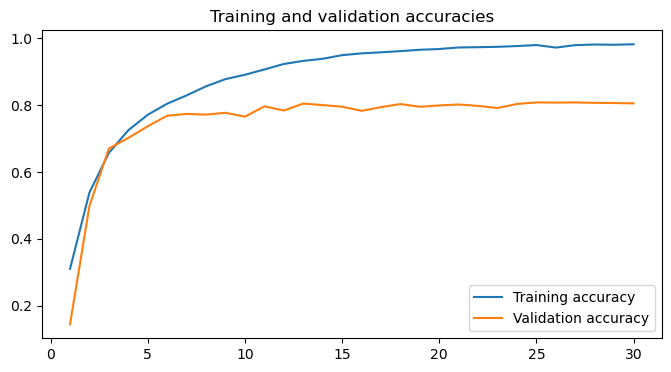

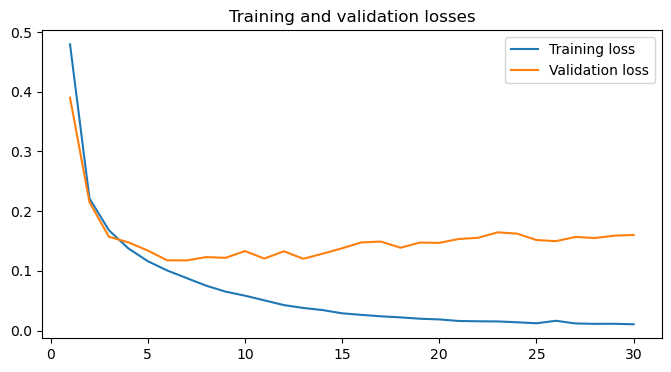

In [ ]:
epochs = range(1, len(history.history["accuracy"]) + 1) 

plt.figure(figsize=(8, 4))
plt.plot(epochs, history.history["accuracy"],   label="Training accuracy")
plt.plot(epochs, history.history["val_accuracy"], label="Validation accuracy") 
plt.title("Training and validation accuracies") 
plt.legend() 
plt.figure(figsize=(8, 4)) 
plt.plot(epochs, history.history["loss"],  label="Training loss") 
plt.plot(epochs, history.history["val_loss"], label="Validation loss") 
plt.title("Training and validation losses") 
plt.legend()
plt.show()

In [ ]:
# model.save("basesd_model_new.hdf5")

In [17]:
model.save("basesd_model_new13_03_23_00.h5")

In [ ]:
# model = models.load_model("basesd_model_new.h5")